 # >>! Purpose
Covid_Data.csv contains data from dates 2020-02-29(February) - 2020-08-06(August). 
The intention is to create a program that separates out each state into its own dataframe, 
clean each new dataframe and analyze the data with the best graphs to show trends in the data.



In [1]:
#import dependencies
from datetime import datetime
from calendar import month_abbr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
deathsByState=pd.read_csv("/Users/Jen/Desktop/GWU/GWU-Project-1/data_resources/Covid_Data.csv")

------------------------------------------------------------------------------------------------------------------

# >> Objective: 
Turn all 54 States into their own variables to hold a dataframe for covid over time by each state

Steps/Pseudo Explanation

Make List of States from original dataframe Positive and Negative Cases is Cumulative by State, Need to get the increase/difference by date Loop through States,
Make loop for postivie total change by State totalChangePositive.append(secondvalue - firstvalue)
Make loop for negative total change by State totalChangeNegative.append(secondvalue - firstvalue)

# >! Preparing List
Separating out the State column to have 55 distinct elements  

In [3]:
#Separating out the State column to have 55 distinct elements 
#56 is the number of rows including the header
print(f'The states and territories included in analysis {deathsByState.state.unique()}')
print(f'The length of states and territories list is: {len(deathsByState.state.unique())}')

The states and territories included in analysis ['AK' 'AL' 'AR' 'AS' 'AZ' 'CA' 'CO' 'CT' 'DC' 'DE' 'FL' 'GA' 'GU' 'HI'
 'IA' 'ID' 'IL' 'IN' 'KS' 'KY' 'LA' 'MA' 'MD' 'ME' 'MI' 'MN' 'MO' 'MP'
 'MS' 'MT' 'NC' 'ND' 'NE' 'NH' 'NJ' 'NM' 'NV' 'NY' 'OH' 'OK' 'OR' 'PA'
 'PR' 'RI' 'SC' 'SD' 'TN' 'TX' 'UT' 'VA' 'VI' 'VT' 'WA' 'WI' 'WV' 'WY']
The length of states and territories list is: 56


------------------------------------------------------------------------------------------------------------------

In [4]:
#Dropping the first 55 rows into a dataframe to work with
deathsByState_drop = deathsByState.head(55)

In [5]:
deathsByState_drop.iloc[[54]]

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
54,20200806,WV,7277.0,300132.0,NaN,123.0,NaN,47.0,NaN,11.0,...,307409,0,0,ebf5f834f24f25065c7f848557a5cfe8de6e1bd3,0,0,0,0,0,NaN


In [6]:
stateSeries = deathsByState['state'][:55]
#print(stateSeries)

------------------------------------------------------------------------------------------------------------------

# >>! Global Variables
Putting the two together// this code grabs all elements from column state and makes them their independent dataframes

In [7]:
#Magic code ***************************************************************************
count = stateSeries
for i in stateSeries:
    count = deathsByState.loc[(deathsByState['state'] == i)]
    globals()[i] = count

In [8]:
#Verifying that FL is now a variable with all of the Florida data assigned
#FL


------------------------------------------------------------------------------------------------------------------

# !< Creating a Daterange Series
Sixth Attempt

Appending Months to their corresponding formated month exp 20200830 = August

In [9]:
#Converting row CA['date'] to a string for slicing
#CA
#numpy.ndarray.astype(dtype, copy=False)
#df['DataFrame Column'] = df['DataFrame Column'].astype(str)
#Note about the Error: This warning is occuring due 
#to the new column being added in place
CA['date']= CA['date'].astype('str', copy=False)

/Users/Jen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [10]:
#CA['date'].dtype

In [11]:
#month_dict is a dictinary that arranges the data with Key(Number), Value(Months) Pair
month_dict = {i: month_abbr[i] for i in range(1, 13)}

In [12]:
#this is a function that splits all of the raw unformatted dates 
#makes a column
#and maps them over the month_dict

def get_month_abbrev(row_in_date_col):
    split = row_in_date_col.split("0")
    #iterating over rows splitting formatted date into a list of strings
    #counting the location of the splits
    if split[2] == '':
        idx = split[3][0]
    else:
        idx = split[2]
    #print(split)
    return month_dict[int(idx)]
CA['daterange'] = CA['date'].map(get_month_abbrev)

/Users/Jen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [13]:
#month_dict

In [14]:
#confirming that all the rows have the corresponding months in new column
#CA['daterange']

In [15]:
#Confirming that CA['daterange'] was appended to DF
#CA

---------------------------------------------------------------------------------------

# >! 
Reformatting index so that Index becomes the X Value

In [16]:
#Values are based on current date, flipping to decending for graph
FL = FL.sort_values(by='date', ascending=True)
CA = CA.sort_values(by='date', ascending=True)
NY = NY.sort_values(by='date', ascending=True)

In [17]:
FL=FL.reset_index()
CA=CA.reset_index()
NY=NY.reset_index()

In [18]:
FL

,index,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,...,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,8580,20200304,FL,2.0,24.0,16.0,NaN,NaN,NaN,NaN,...,26,0,0,b53d530bf94552ea4304fbfd2b4f20eacbb62dce,0,0,0,0,0,NaN
1,8558,20200305,FL,9.0,31.0,69.0,NaN,NaN,NaN,NaN,...,40,0,0,78051844675b3464a839fe95c5e0c40c0fd79ca1,0,0,0,0,0,NaN
2,8525,20200306,FL,9.0,55.0,51.0,NaN,NaN,NaN,NaN,...,64,0,0,a0172193d7cf2c1c45c672b3e64fa0a0b9ec807c,0,0,0,0,0,NaN
3,8477,20200307,FL,14.0,100.0,88.0,NaN,NaN,NaN,NaN,...,114,0,0,914041890fd2c1e06a80fbbbd47f2289c9958968,0,0,0,0,0,NaN
4,8427,20200308,FL,17.0,118.0,108.0,NaN,NaN,NaN,NaN,...,135,0,0,3d2942aef7f73ad5a50a33896138a9403e50638d,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,234,20200802,FL,487132.0,3233865.0,3394.0,7952.0,27524.0,NaN,NaN,...,3720997,62,180,4226aafea9046160b5186e830453e60c65487f65,0,0,0,0,0,NaN
152,178,20200803,FL,491884.0,3260914.0,3228.0,7938.0,27744.0,NaN,NaN,...,3752798,73,220,cb1200bf3ba3db8d3202aa4e724943524037bba4,0,0,0,0,0,NaN
153,122,20200804,FL,497330.0,3287128.0,3280.0,7857.0,28333.0,NaN,NaN,...,3784458,247,589,1b31b1a08b39801931c5906c421002bd8e4ac9a9,0,0,0,0,0,NaN
154,66,20200805,FL,502739.0,3312145.0,3277.0,7615.0,28956.0,NaN,NaN,...,3814884,225,623,df3ca7e5b82e443c67bc254da0ec0233c8d8eb56,0,0,0,0,0,NaN


In [19]:
#df.rename(columns={"A": "a", "B": "c"})
FL = FL.rename(columns = {'level_0': 'DateInterval'})
FL = FL.drop(['index'], axis=1)
CA = CA.rename(columns = {'level_0': 'DateInterval'})
CA = CA.drop(['index'], axis=1)
NY = NY.rename(columns = {'level_0': 'DateInterval'})
NY = NY.drop(['index'], axis=1)

In [20]:
#df['index1'] = df.index
FL['index'] = FL.index
CA['index'] = CA.index
NY['index'] = NY.index

In [21]:
len(CA)

156

# >! Line Graph Code
This is the map code for NY, FL, and CA over time with an interval from the first case, = Day 1 of covid/March to August = Day 160
Protected Variables are State Names, ie CA
do not change these variables

In [22]:
yAxisFL = FL['positive']
yAxisCA = CA['positive']
yAxisNY = NY['positive']
xAxisFL = CA['index']
xAxisCA = CA['index']
xAxisNY = CA['index']


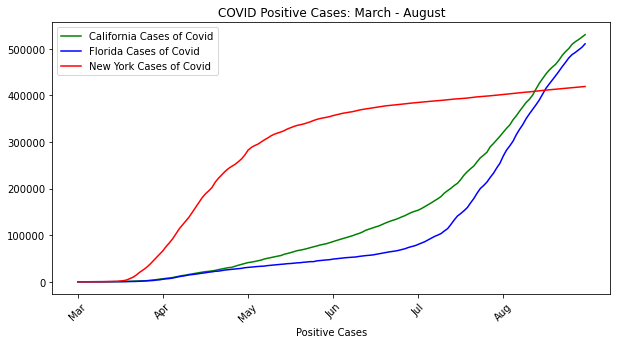

<Figure size 432x288 with 0 Axes>

In [23]:
#using pyplot to illustrate the increase in covid over time
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(xAxisCA, yAxisCA, color='green', label = 'California Cases of Covid')
ax.plot(xAxisFL, yAxisFL, color='blue', label = 'Florida Cases of Covid')
ax.plot(xAxisNY, yAxisNY, color='red', label = 'New York Cases of Covid')
ax.set_xlabel('Time Interval')
ax.set_xlabel('Positive Cases')
ax.legend(loc='upper left', frameon=True) 
plt.xticks(CA.index, CA.daterange.unique())
plt.locator_params(nbins=6)
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
plt.title('COVID Positive Cases: March - August')
plt.show()
plt.savefig("CovidStateGraph.png")

# !> Summation & Analysis
For this set of data the states chosen are to represent COVID cases from the supposed beginning of the outbreak to the closest date for this analysis. Based on the graph and the data, the middle of March is when the first cases of COVID appeared. New York was the first state to recieve appreciable cases of COVID. Their cases went from a little under 10,000 to close to 300,000 cases in one month(from April to May). The figure above represents the change in cases over time for the data beginning on March 4, 2020 to August 6, 2020. Other suggestions to consider and study is the relation of the data to the 'Shut down', when each individual state set new guidelines for the openning and closing of businesses. Further work suggested is a cumulative line for cases over the United States, and a graph that shows all the states increase over time.

# !> Resources
The data comes from the COVID Tracking Project, an organization formed by 'The Atlanic'
a newspaper and online resource for news. They collect COVID data from all 50 states and territories daily. 

Link to Resource: https://covidtracking.com/
Link to CSV: https://covidtracking.com/api/v1/states/daily.csv

# !> Credits

Code by Jen S
Cynthia, David, and Kent all assisted in setup, code development and debugging of this data aqusition.